# Volcanic Impact in Obs

GPCC v7

* Wenchang Yang (wenchang@princeton.edu)
* Department of Geosciences, Princeton University

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

import geoxarray
from geoplots import mapplot
import xlearn
from climindex import get_climate_index
from geoplots import xticksmonth

!date
%matplotlib notebook

Fri Mar 30 16:55:26 EDT 2018


In [25]:
das = dict()
ncfile = '/tigress/wenchang/data/gpcc/precip.mon.total.v7.nc'
data_name = 'precip'
lons_sahel = slice(-20,10)
lats_sahel = slice(20,10)

In [29]:
ds = xr.open_dataset(ncfile)
da = ds[data_name].load()
# re-center on lon=0
lon = da.lon.roll(lon=da.lon.size//2).values
lon[lon>180] = lon[lon>180] - 360
da = da.roll(lon=da.lon.size//2).assign_coords(lon=lon)

# anomaly from clim
da_clim = da.groupby('time.month').mean('time')
da = da.groupby('time.month') - da_clim
da = da.resample(time='MS').mean('time')

ts = da.sel(lon=lons_sahel, lat=lats_sahel).geo.fldmean().load() # Sahel-mean 

## Agung 1963

In [32]:
# raw data
year_erupt = 1963
years_before = slice(f'{year_erupt - 5}', f'{year_erupt - 1}')
years_after = slice(f'{year_erupt}', f'{year_erupt + 2}')
units = 'mm/day'

damean = da.sel(time=years_before).groupby('time.month').mean('time')
daa = da.sel(time=years_after).groupby('time.month') - damean # anomaly
daa = daa.resample(time='QS-Dec').mean('time').isel(time=slice(1,None)) # seasonal mean
das['pre.anom.agung'] = daa

<IPython.core.display.Javascript object>


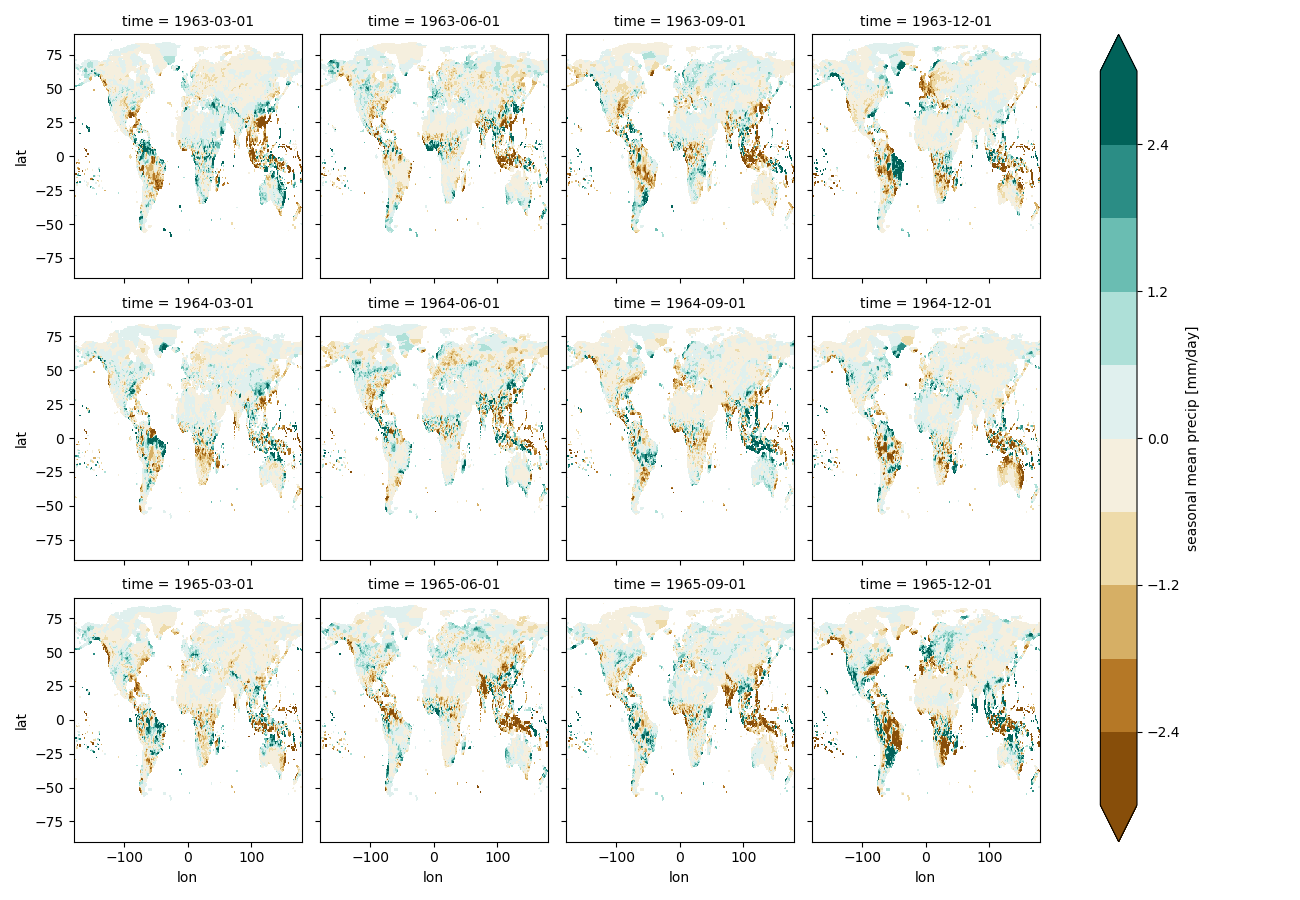

In [33]:
daa.pipe(lambda x: x/30.0).rename(f'seasonal mean {data_name} [{units}]')\
    .plot(col='time', col_wrap=4, robust=True, levels=10, cmap='BrBG')

<IPython.core.display.Javascript object>


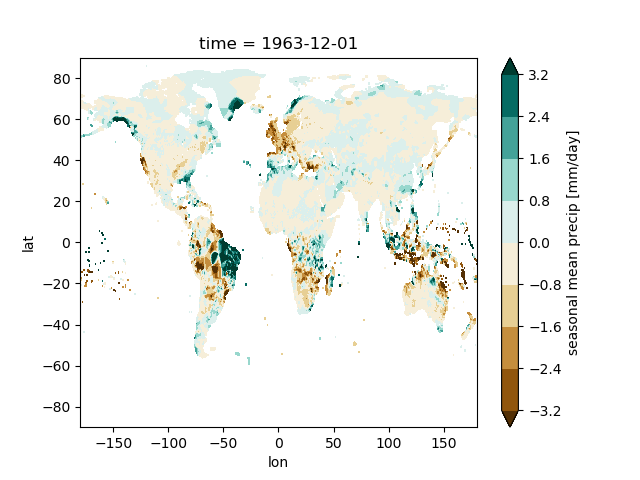

In [34]:
# following winter
daa.sel(time=f'{year_erupt}-12').pipe(lambda x: x/30.0).rename(f'seasonal mean {data_name} [{units}]')\
    .plot(robust=True, levels=10, cmap='BrBG')

<IPython.core.display.Javascript object>


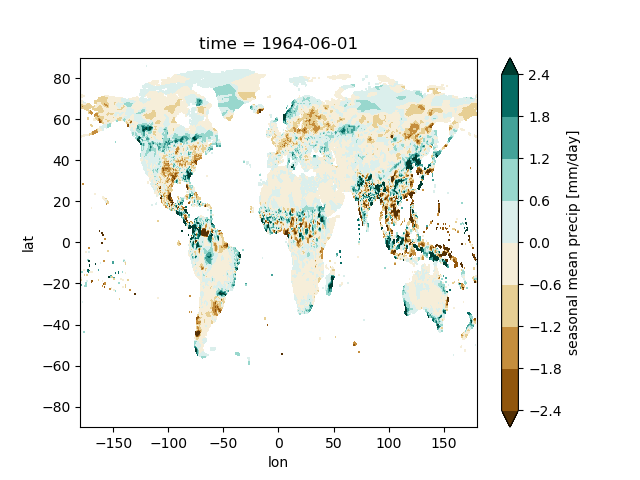

In [35]:
# next-year summer
daa.sel(time=f'{year_erupt+1}-06').pipe(lambda x: x/30.0).rename(f'seasonal mean {data_name} [{units}]')\
    .plot(robust=True, levels=10, cmap='BrBG')

<IPython.core.display.Javascript object>


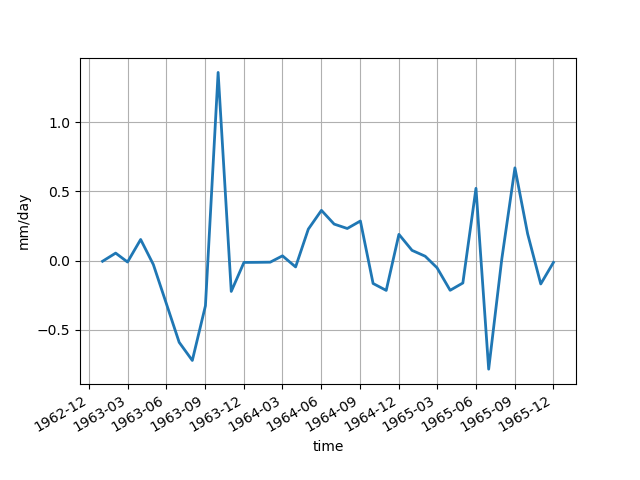

Text(0,0.5,'mm/day')

In [36]:
# Sahel rainfall time series
ts_ = ts.sel(time=years_after).groupby('time.month') \
    - ts.sel(time=years_before).groupby('time.month').mean('time') # anomaly
ts_.pipe(lambda x: x/30.).plot()
xticksmonth(range(3,13,3))
plt.grid(True)
plt.ylabel(units)
# plt.ylim(-1,1.5)

## Chichon 1982

In [37]:
year_erupt = 1982
years_before = slice(f'{year_erupt - 5}', f'{year_erupt - 1}')
years_after = slice(f'{year_erupt}', f'{year_erupt + 2}')
units = 'mm/day'

damean = da.sel(time=years_before).groupby('time.month').mean('time')
daa = da.sel(time=years_after).groupby('time.month') - damean
daa = daa.resample(time='QS-Dec').mean('time').isel(time=slice(1,None))
das['pre.anom.chichon'] = daa

<IPython.core.display.Javascript object>


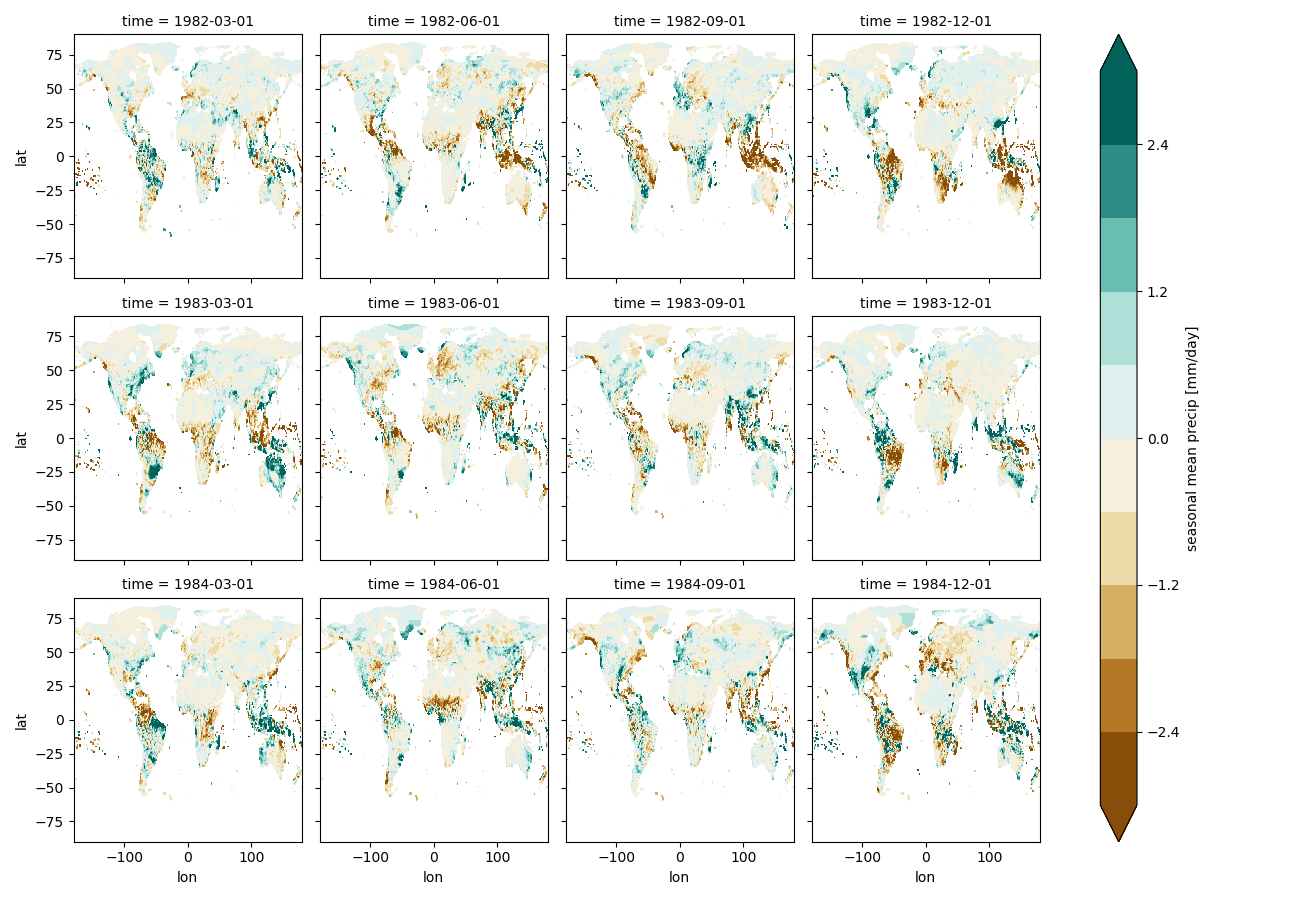

In [38]:
daa.pipe(lambda x: x/30.0).rename(f'seasonal mean {data_name} [{units}]')\
    .plot(col='time', col_wrap=4, robust=True, levels=10, cmap='BrBG')

<IPython.core.display.Javascript object>


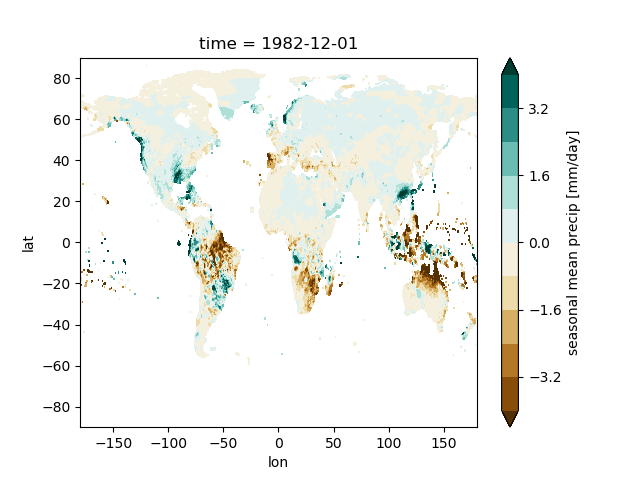

In [39]:
# following winter
daa.sel(time=f'{year_erupt}-12').pipe(lambda x: x/30.0).rename(f'seasonal mean {data_name} [{units}]')\
    .plot(robust=True, levels=10, cmap='BrBG')

<IPython.core.display.Javascript object>


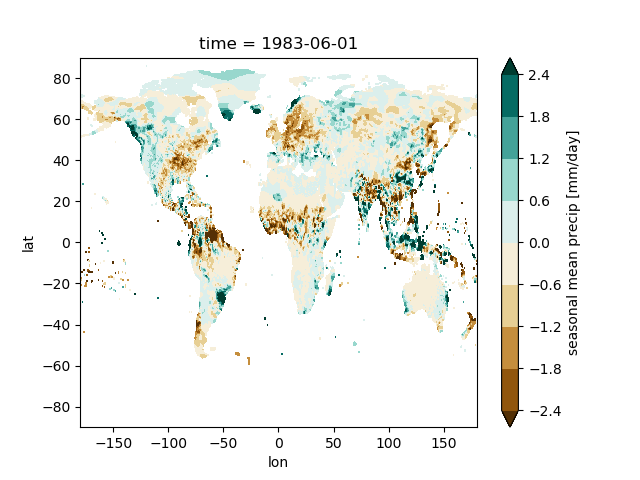

In [40]:
# next-year summer
daa.sel(time=f'{year_erupt+1}-06').pipe(lambda x: x/30.0).rename(f'seasonal mean {data_name} [{units}]')\
    .plot(robust=True, levels=10, cmap='BrBG')

<IPython.core.display.Javascript object>


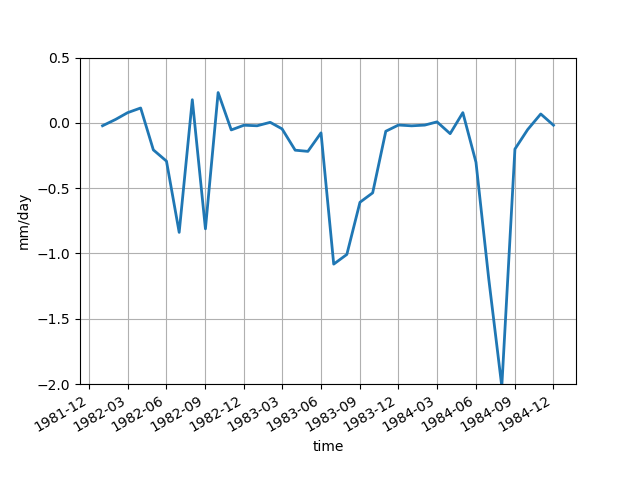

(-2, 0.5)

In [41]:
# Sahel rainfall time series
ts_ = ts.sel(time=years_after).groupby('time.month') \
    - ts.sel(time=years_before).groupby('time.month').mean('time') # anomaly
ts_.pipe(lambda x: x/30.).plot()
xticksmonth(range(3,13,3))
plt.grid(True)
plt.ylabel(units)
plt.ylim(-2,.5)

## Pinatubo 1991

In [42]:
year_erupt = 1991
years_before = slice(f'{year_erupt - 5}', f'{year_erupt - 1}')
years_after = slice(f'{year_erupt}', f'{year_erupt + 2}')
units = 'mm/day'

damean = da.sel(time=years_before).groupby('time.month').mean('time')
daa = da.sel(time=years_after).groupby('time.month') - damean
daa = daa.resample(time='QS-Dec').mean('time').isel(time=slice(1,None))
das['pre.anom.pinatubo'] = daa

<IPython.core.display.Javascript object>


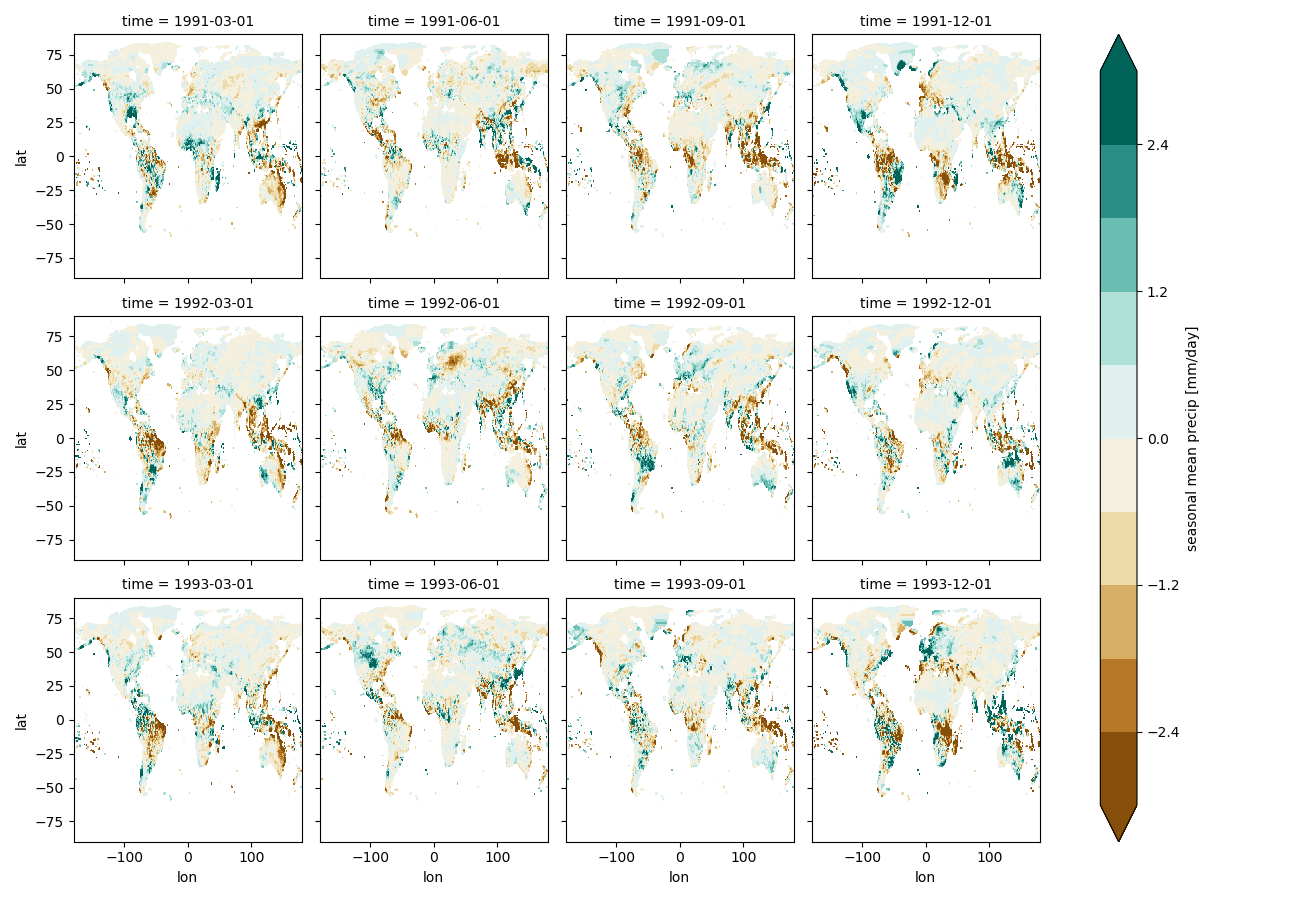

In [43]:
daa.pipe(lambda x: x/30.0).rename(f'seasonal mean {data_name} [{units}]')\
    .plot(col='time', col_wrap=4, robust=True, levels=10, cmap='BrBG')

<IPython.core.display.Javascript object>


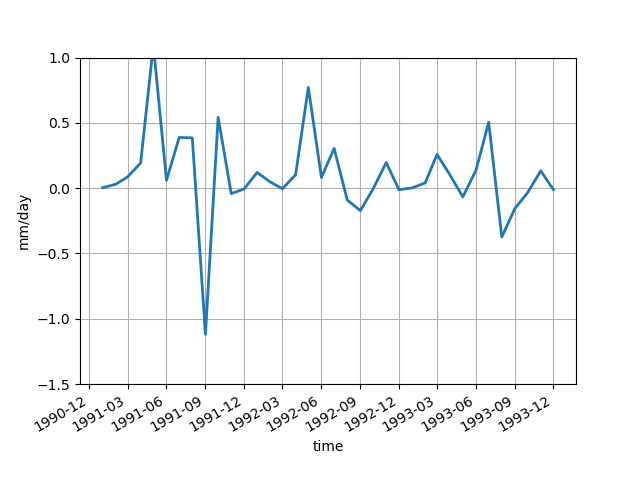

(-1.5, 1)

In [44]:
# Sahel rainfall time series
ts_ = ts.sel(time=years_after).groupby('time.month') \
    - ts.sel(time=years_before).groupby('time.month').mean('time') # anomaly
ts_.pipe(lambda x: x/30.).plot()
xticksmonth(range(3,13,3))
plt.grid(True)
plt.ylabel(units)
plt.ylim(-1.5,1)

## ENSO removed

In [175]:
nino = xr.DataArray.from_series(get_climate_index('nino34')) \
    .rename({'index': 'time'}) \
    .resample(time='MS').mean('time')
nino1901_2016 = nino.sel(time=slice('1901', '2016'))
r = da.learn.regress(nino1901_2016)
da_res = da - r.coef_da * nino1901_2016

//home/wenchang/wython/xlearn/linear_model.py:91: RuntimeWarning: invalid value encountered in multiply
  b = np.empty((n_grids, n_features)) * np.nan
//home/wenchang/wython/xlearn/linear_model.py:123: RuntimeWarning: invalid value encountered in multiply
  p = np.empty( (n_grids, n_features) ) * np.nan
//home/wenchang/wython/xlearn/linear_model.py:129: RuntimeWarning: invalid value encountered in true_divide
  t = self.coef_ / se
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0

In [72]:
#  ENSO removed
year_erupt = 1963
years_before = slice(f'{year_erupt - 5}', f'{year_erupt - 1}')
years_after = slice(f'{year_erupt}', f'{year_erupt + 2}')
units = 'mm/day'

damean = da_res.sel(time=years_before).groupby('time.month').mean('time')
daa = da_res.sel(time=years_after).groupby('time.month') - damean # anomaly
daa = daa.resample(time='QS-Dec').mean('time').isel(time=slice(1,None)) # seasonal mean
das['pre.anom.res.agung'] = daa

<IPython.core.display.Javascript object>


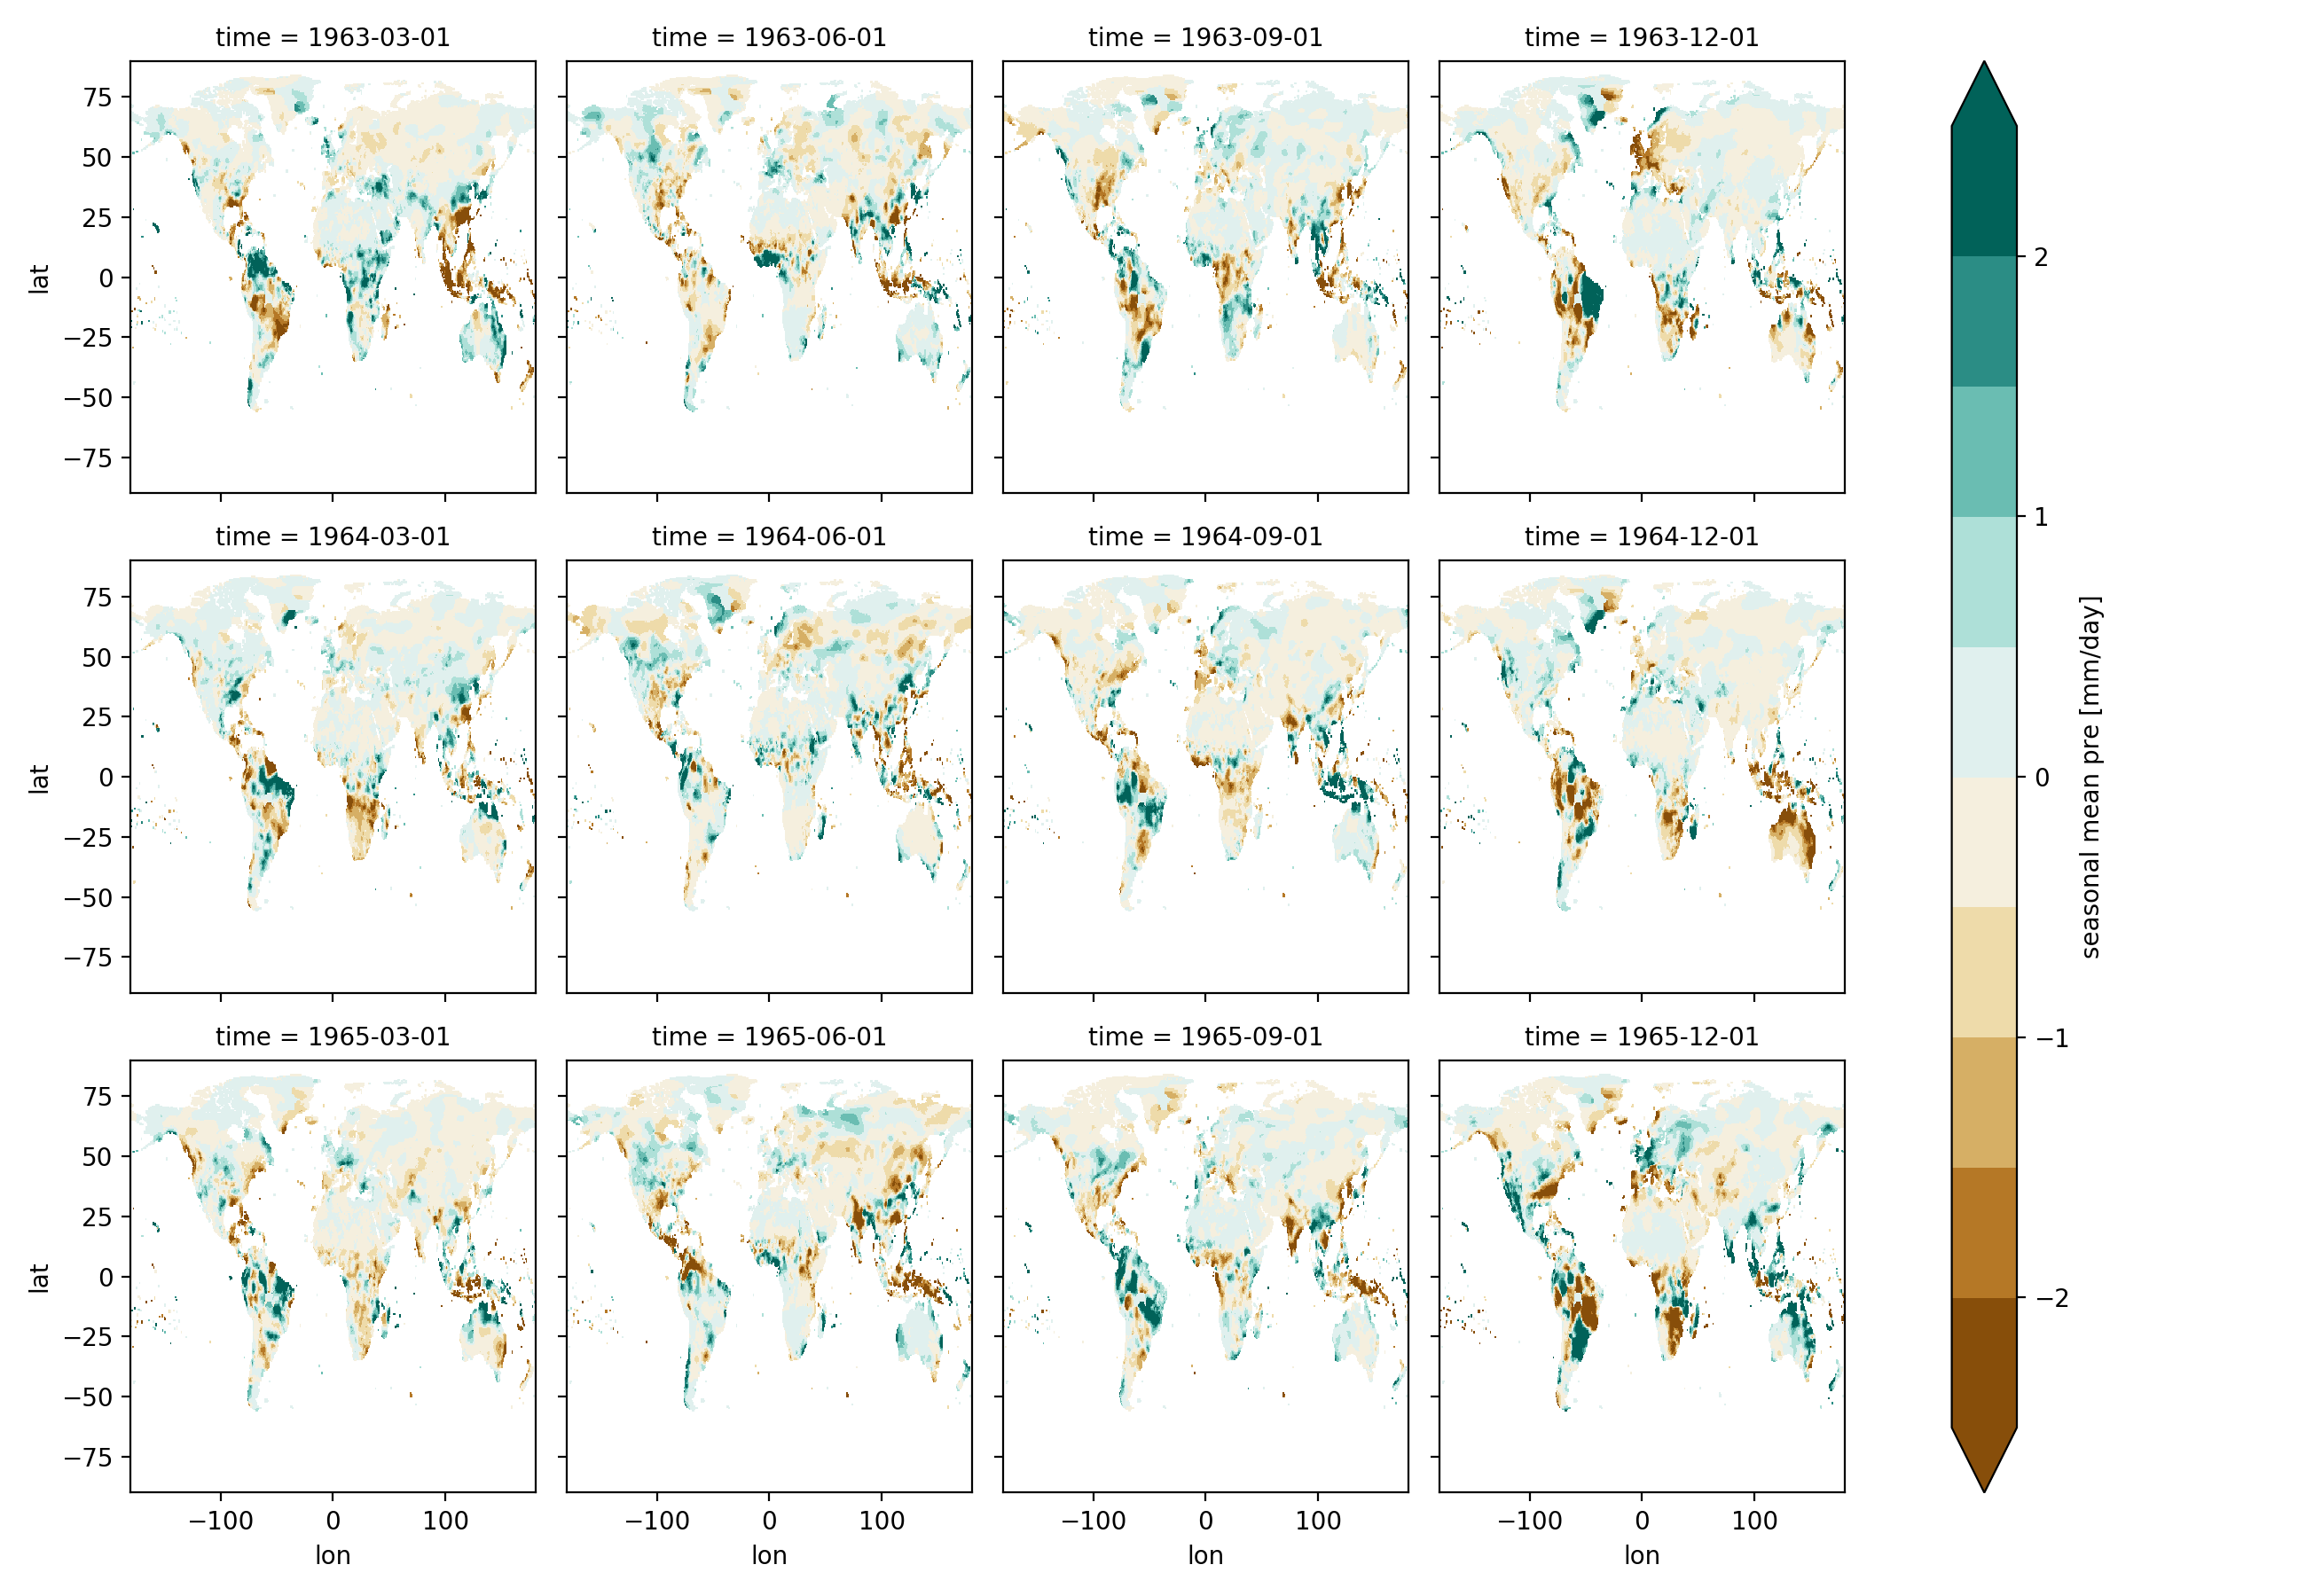

In [63]:
daa.pipe(lambda x: x/30.0).rename(f'seasonal mean {data_name} [{units}]')\
    .plot(col='time', col_wrap=4, robust=True, levels=10, cmap='BrBG')

<IPython.core.display.Javascript object>


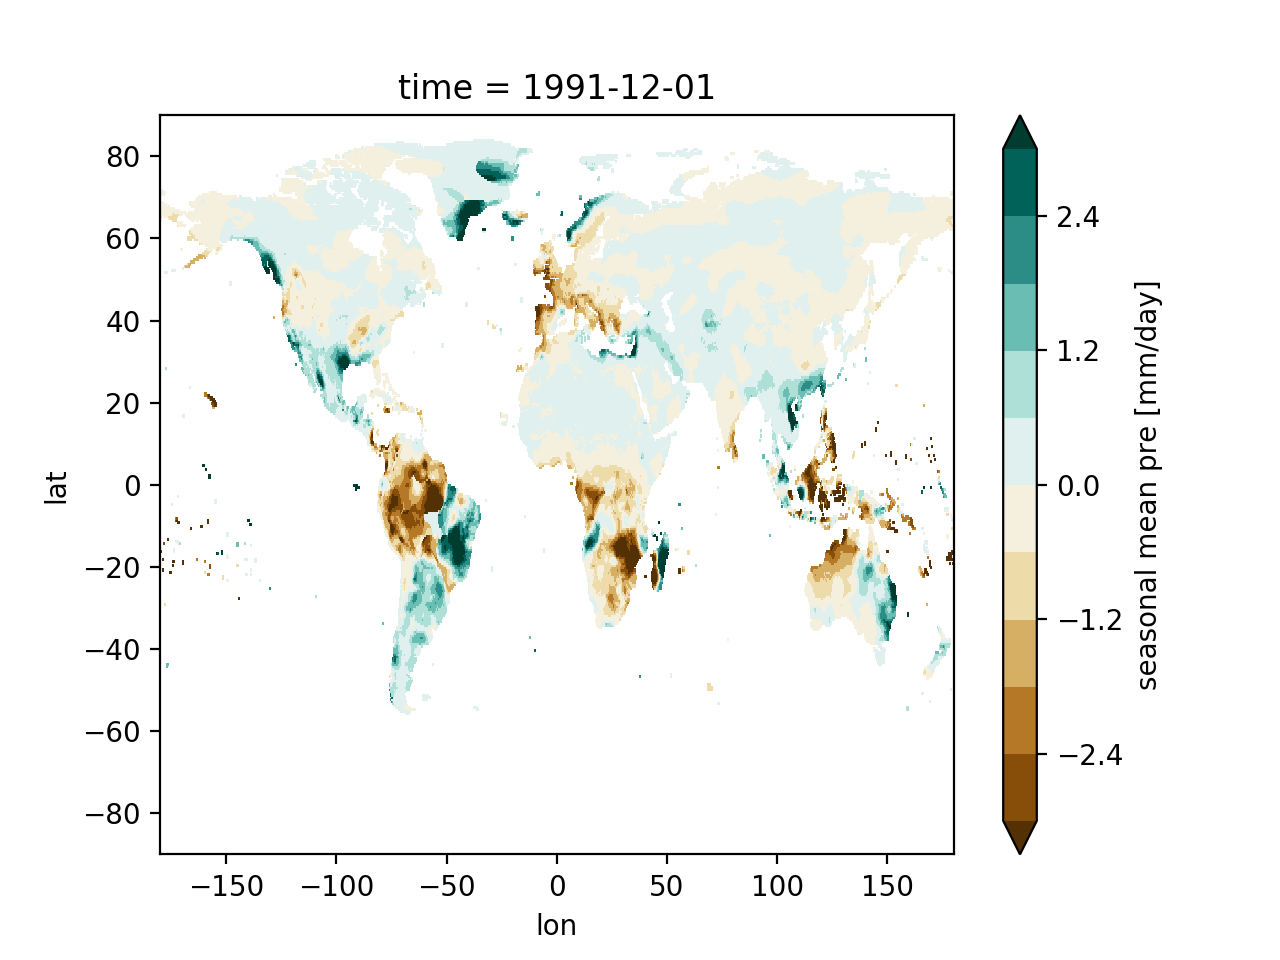

In [120]:
# following winter
daa.sel(time=f'{year_erupt}-12').pipe(lambda x: x/30.0).rename(f'seasonal mean {data_name} [{units}]')\
    .plot(robust=True, levels=10, cmap='BrBG')

<IPython.core.display.Javascript object>


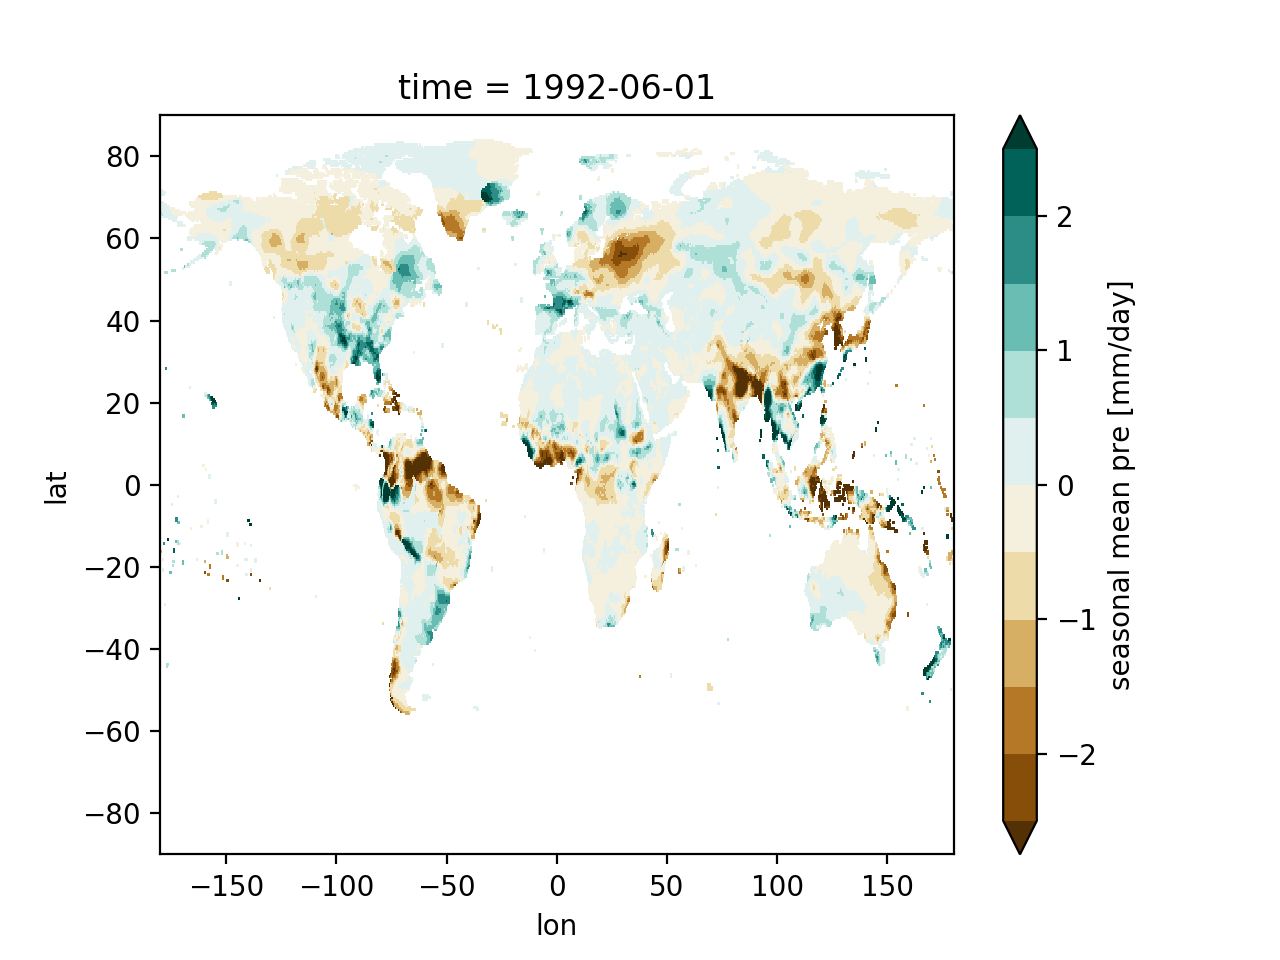

In [121]:
# next-year summer
daa.sel(time=f'{year_erupt+1}-06').pipe(lambda x: x/30.0).rename(f'seasonal mean {data_name} [{units}]')\
    .plot(robust=True, levels=10, cmap='BrBG')

<IPython.core.display.Javascript object>


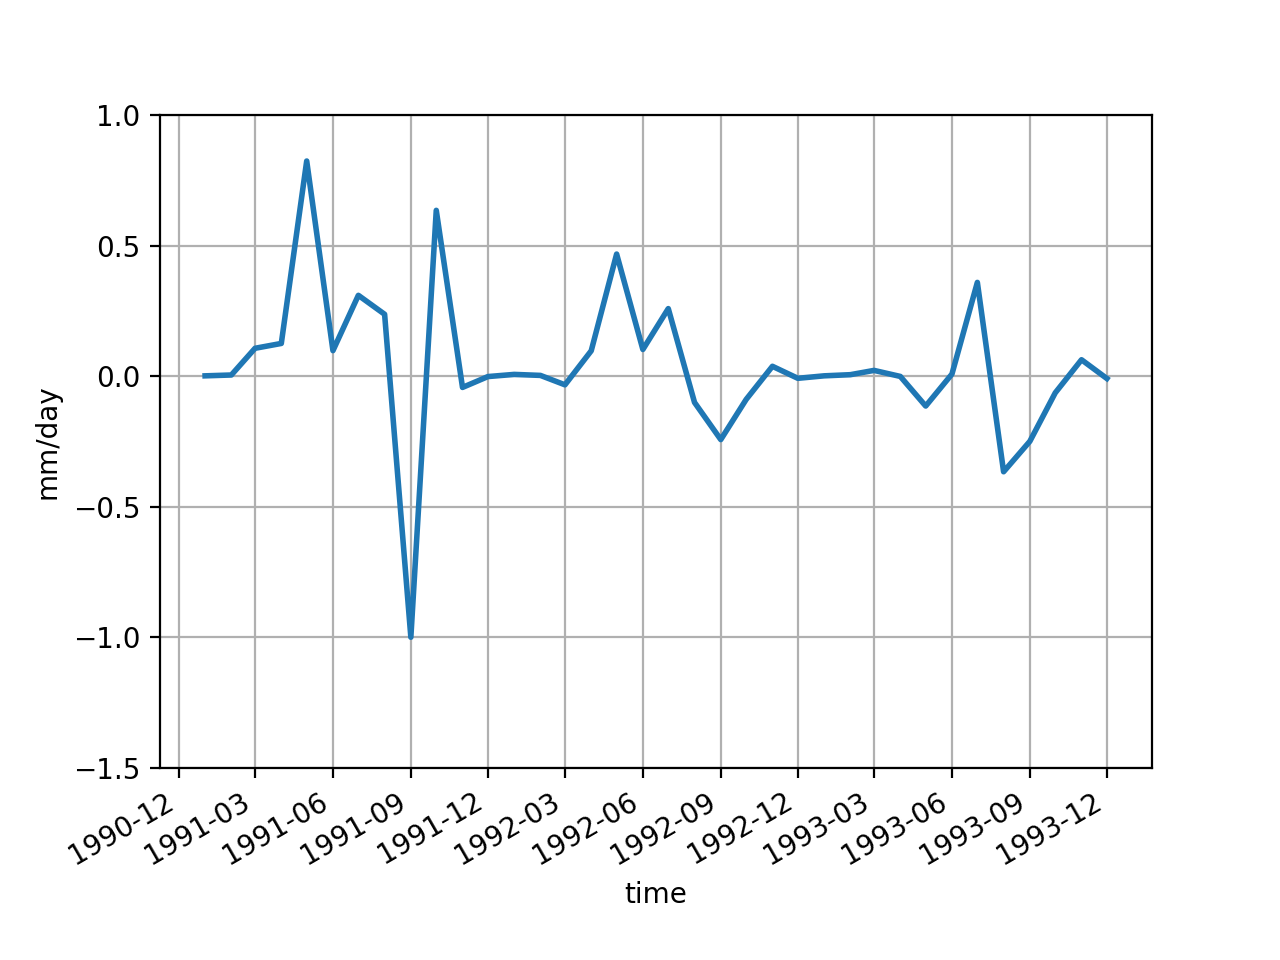

(-1.5, 1)

In [123]:
# Sahel rainfall time series
ts_ = ts.sel(time=years_after).groupby('time.month') \
    - ts.sel(time=years_before).groupby('time.month').mean('time') # anomaly
ts_.pipe(lambda x: x/30.).plot()
xticksmonth(range(3,13,3))
plt.grid(True)
plt.ylabel(units)
plt.ylim(-1.5, 1)